### Assignment 17.1 Practical Application Assignment 17.1: Comparing Classifiers

**Data Set The dataset you will use comes from the UCI Machine Learning repository Links to an external site.. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site.accompanying the dataset (in the .zip file) for more information on the data and features.

** problem: Comparing solutions using (k-nearest neighbors, logistic regression, decision trees, and support vector machines
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve

#from sklearn.compose import make_column_transformer
from sklearn import set_config


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time

set_config(display="diagram")

### Prepare to get the data for UCIsite

In [2]:
!pip install ucimlrepo

In [33]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
#print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [5]:
X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [6]:

data =X.copy()
print(data.columns)
print(data.isna().sum())
print(data.info())
print(data.describe())

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 

### Data Cleaning and Data encoding
  We have a few object columns that we need to convert to numerical columns 
  we will use labelEncoder 

In [7]:
Encoder=LabelEncoder()

for i in data.select_dtypes(include='object').columns.values:
    data[i]=Encoder.fit_transform(data[i])
    print(data[i].isna().sum())

print(data.isna().sum())

0
0
0
0
0
0
0
0
0
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


In [8]:
#final look of the data after cleanning 
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [9]:
# first look at the features that are correlated to ranks
### will convert to a binary classification
# top_ten =1, for songs in top 10 or  top_ten =0 for others

## reduce datasize to 200 so it runs on my laptop.  
num_samples_to_keep =200
X_org =data.copy()
y_org =y 

random_indices = np.random.choice(len(X_org), size=num_samples_to_keep, replace=False)

X = X_org.iloc[random_indices]
y = y_org.iloc[random_indices]
#X=X_org
#y=y_org
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Compare of the four models: KNN,  LogisticRegression, Decision tree, SVC
### will also use Grid search to find optimal parameters for some of them
### will compare the results on both accuracies with test, training and time taken to train
### at the end, will plot to ROC curve for folks who are interested.


In [11]:
# KNN 
knn_pipe = KNeighborsClassifier()

# Define the hyperparameters and their possible values
params = {'n_neighbors': [3, 5, 7, 10, 20]}

# Create a GridSearchCV object with the KNN classifier and parameter grid
grid = GridSearchCV(estimator=knn_pipe, param_grid=params, cv=5)  # You can specify the number of cross-validation folds (cv)

# Fit the GridSearchCV object to your training data
grid.fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
best_n= grid.best_params_['n_neighbors']

#Now use the best KNN parameter to  find trainig time
knn_pipe = KNeighborsClassifier(n_neighbors =best_n)

start_time = time.time()
knn_pipe.fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
knn_training_time = end_time - start_time

/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [12]:
knn_score_test= accuracy_score(knn_pipe.predict(X_test), y_test)
knn_score_train= accuracy_score(knn_pipe.predict(X_train), y_train)
print('knn_score_train is ', knn_score_train )
print('knn_score_test is ', knn_score_test)
print ('Best_n', best_n)
test_predictions = knn_pipe.predict_proba(X_test)
print('knn_training_time ', knn_training_time)
### save results 
# Best_n 7
# knn_training_time  0.0004830360412597656

knn_score_train is  0.9133333333333333
knn_score_test is  0.86
Best_n 3
knn_training_time  0.0006299018859863281


In [ ]:
### Logistic Regresssion



In [13]:
# Gridsearch to find the optimal paramenters for logistic Regression
lgr =LogisticRegression()
params = {'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',],
         'C': [0.1, 1.0, 10.0, 100.0],}

grid = GridSearchCV(lgr, param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
best_solver = grid.best_params_['solver']
best_C = grid.best_params_['C']
print(grid_score)
print(best_solver, best_C)

### Save results 


/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

0.84
newton-cg 0.1


In [14]:
print(grid_score)
print(best_solver, best_C)

0.84
newton-cg 0.1


In [15]:

start_time = time.time()
lgr_best = LogisticRegression(solver =best_solver, C = best_C).fit(X_train, y_train)
end_time = time.time()
lgr_score_test= accuracy_score(lgr_best.predict(X_test), y_test)
lgr_score_train= accuracy_score(lgr_best.predict(X_train), y_train)
print('lgr_score_train is ', lgr_score_train )
print('lgr_score_test is ', lgr_score_test)
# Calculate the training time with default parameters
lgr_training_time = end_time - start_time
print('Logistic Regreassion _training_time ', lgr_training_time)


lgr_score_train is  0.94
lgr_score_test is  0.84
Logistic Regreassion _training_time  0.0341029167175293


/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
svc = SVC()
params = {'kernel': ['rbf'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}
grid = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
best_kernel = grid.best_params_['kernel']
best_gamma =grid.best_params_['gamma']
print(grid_score)
print(best_kernel)

0.9
rbf


/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [17]:
#Now use the best parameters and find the training time
start_time = time.time()
svc = SVC(kernel= 'rbf', gamma=0.9).fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
SVC_training_time = end_time - start_time
svc_score_test= accuracy_score(svc.predict(X_test), y_test)
svc_score_train= accuracy_score(svc.predict(X_test), y_test)
print('SVC RBF _training_time ',  SVC_training_time) 
print('svc_score_train is ', svc_score_train )
print('svc_score_test is ', svc_score_test )

SVC RBF _training_time  0.006838083267211914
svc_score_train is  0.9
svc_score_test is  0.9


/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
### Decision tree
start_time = time.time()
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
end_time = time.time()
dt_training_time = end_time - start_time
y_pred = dt_classifier.predict(X_test)
from sklearn.metrics import  classification_report

# Calculate the accuracy of the model
dt_score_test= accuracy_score(dt_classifier.predict(X_test), y_test)
dt_score_train= accuracy_score(dt_classifier.predict(X_train), y_train)
print('decisiontree Classifier _training_time ',  dt_training_time) 
print("Accuracy_train:", dt_score_train)
print("Accuracy_test:", dt_score_test)
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


decisiontree Classifier _training_time  0.00803375244140625
Accuracy_train: 1.0
Accuracy_test: 0.8
Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.89      0.89        45
         yes       0.00      0.00      0.00         5

    accuracy                           0.80        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.80      0.80      0.80        50



# Comparing the four models:
## KNN
knn_score_train is  0.9133333333333333
knn_score_test is  0.86
Best_n 3
knn_training_time  0.0006299018859863281

# LGR 
lgr_score_train is  0.94
lgr_score_test is  0.84
Logistic Regreassion _training_time  0.0341029167175293

## SVC

SVC RBF _training_time  0.006838083267211914
svc_score_train is  0.9
svc_score_test is  0.9

## Decision Tree Classifier
 decisiontree Classifier _training_time  0.00803375244140625
Accuracy_train: 1.0
Accuracy_test: 0.8


#### Visualizing with scikitlearn

Below, we use the `RocCurveDisplay` to display roc curves for three knn models.  You can either use predictions or estimators to create the visualization.  Below, we use the `from_estimator` method.

In [21]:
from sklearn.metrics import RocCurveDisplay

In [22]:
knn_1 = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_1.fit(X_train, y_train)

/Users/personal/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('transform', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

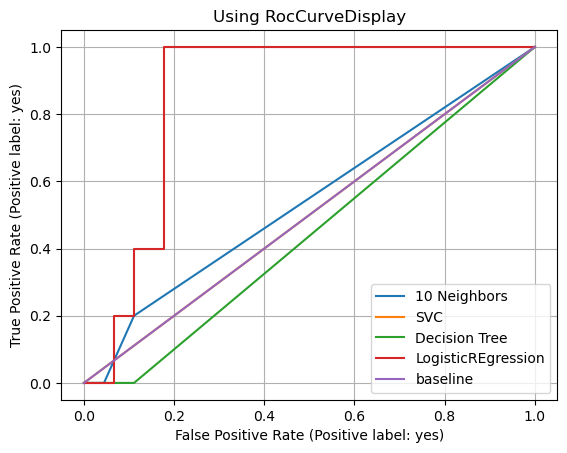

In [32]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, pos_label = 'yes', ax = ax, label = '10 Neighbors')
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax = ax, label = 'SVC')
RocCurveDisplay.from_estimator(dt_classifier, X_test, y_test, ax = ax, label = 'Decision Tree')
RocCurveDisplay.from_estimator(lgr_best, X_test, y_test, ax = ax, label = 'LogisticREgression')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();